#### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 6
### Due: Monday, Mar 14th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on March 14th (after Spring Break).

---

## Problem 1

**The Leavitt Law**

Cepheid variable stars in galaxies follow a linear relation between their log periods, log metallicity, and apparent magnitude (the Leavitt law):

$$m_i^W = zp_{W,N4258} + b_W \log P_i + Z_w \Delta \log (O/H)_i \;\;\; (1)$$

where 
$$m^W = m_H - 0.39(V-I)$$

and is called the "Wesenheit magnitude".

The index $i$ here denotes the individual Cepheids in a sample.


Download table 4 from Riess et al. (2016):

https://ui.adsabs.harvard.edu/abs/2016yCat..18260056R/abstract

You will find the tables here:
https://cdsarc.cds.unistra.fr/viz-bin/cat/J/ApJ/826/56#/browse
Table descriptions are in the readme file.

Use the data for Cepheids in NGC 4258 from Table 4. Assuming that there is no intrinsic scatter in the Leavitt law, the parameters
of Equation (1) can be determined through ordinary least squares. Determine the best-fit
parameters $zp_{W,N4258}$, $b_W$, and $Z_w$ and their Gaussian covariance matrix. Plot the data $m^W_i$ vs. $\log_{10} P_i$ and overlay the best fit model (evaluated at the mean metallicity of the sample).








### Solution

       Gal      RAdeg     DEdeg        ID     Per   V-I  F160W  sigTot  [O/H]
0     M101  210.87979  54.33376    115287  17.950  0.96  22.47    0.30  9.134
1     M101  210.89127  54.35620    136682   5.358  1.06  24.41    0.57  9.118
2     M101  210.89227  54.36125    148312  11.860  1.07  22.94    0.32  9.113
3     M101  210.89351  54.36826    164932  14.920  1.13  23.03    0.32  9.105
4     M101  210.87982  54.33565    121146  11.860  0.96  23.14    0.45  9.136
...    ...        ...       ...       ...     ...   ...    ...     ...    ...
1481   M31   10.92917  41.24755  M31_ceph  43.050  1.78  16.82    0.15  8.900
1482   M31   11.69675  42.08064  M31_ceph  43.740  1.50  16.97    0.15  8.900
1483   M31   11.29560  41.60410  M31_ceph  48.450  2.49  17.44    0.15  8.900
1484   M31   10.91809  41.18565  M31_ceph  56.240  2.07  17.03    0.15  8.900
1485   M31   11.06418  41.56925  M31_ceph  78.000  1.82  16.05    0.15  8.900

[1486 rows x 9 columns]

[zp, bw, zw]: [28.88229831  0.04497528

Text(0, 0.5, 'mWi')

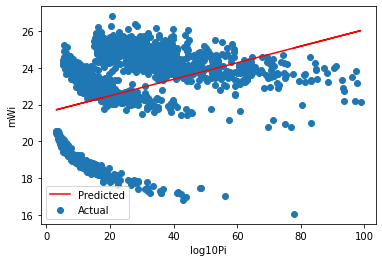

In [78]:
# source consulted: https://www.geeksforgeeks.org/pandas-read_table-function/]
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

import pandas as pd
from scipy.optimize import curve_fit

# Read the table
url = 'https://cdsarc.cds.unistra.fr/ftp/J/ApJ/826/56/table4.dat'
label = ['Gal', 'RAdeg', 'DEdeg', 'ID', 'Per', 'V-I', 'F160W', 'sigTot', '[O/H]']
df = pd.read_table(url, names = label, delim_whitespace=',')
print(df)
print()

def law(x, zp, bw, zw):
    # Function of the Leavitt Law
    logpi = x[0]
    logOH = x[1]
    
    law = zp + bw * logpi + zw * logOH
    return law

# Two given values in the table, used for x
x = [df['Per'].values, df['[O/H]'].values]
y = df['F160W'].values
popt, pcov = curve_fit(law, x, y)

print('[zp, bw, zw]:',popt)
print()
print('Covariance matrix:')
print(pcov)

def predicted():
    # Function of the predicted Wesenheit magnitude
    zp = popt[0]
    bw = popt[1]
    zw = popt[2]
    meanOH = df['[O/H]'].mean()
    return law([df['Per'].values, meanOH], zp, bw, zw)

# Graph of mWi against log10Pi
x = df['Per']
y = df['F160W']

# Sketch the graph
plt.scatter(x,y)
plt.plot(x, predicted(), color = 'red')
plt.legend(['Predicted','Actual'])
plt.xlabel('log10Pi')
plt.ylabel('mWi')

## Problem 2

**Posterior probability distribution of binomial distribution**

Given a set of $N$ measurements, $x_i$, drawn from a binomial distribution described with parameter $b$, we seek the posterior probability distribution $p(b|x_i)$.

When $N$ is large, $b$ and its (presumably Gaussian) uncertainty $\sigma_b$ can be determined using the equation above. For small $N$, the proper procedure is as follows. Assuming that the prior for $b$ is at in the range 0-1, the posterior probability for $b$ is

$$p(b|k,N) = C b^k (1-b)^{N-k}$$

where $k$ is now the actual observed number of successes in a data set of $N$ values, and $C$ is a normalization factor with can be determined from the condition

$$\int_0 ^1 p(b|k,N)db=1.$$

The maximum posterior occurs at $b_0 = k/N$.

Write code for calculating the posterior distribution.
Vary the value $b$ and draw the resulted posterior probability distribution from our data set. 

In comparison, also calculate a Gaussian distribution from the same data set.


### Solution



In [44]:
import numpy as np
from scipy import stats

from scipy.stats import norm

%matplotlib inline
import matplotlib.pyplot as plt

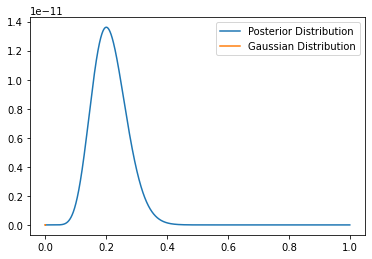

In [56]:
# Choose values for k and N
k = 10
N = 50

def posterior(b, k, N):
    return (b**k)*((1-b)**(N-k))

def post_dist(k, N):
    lst_1 = []
    
    lst_2 = np.arange(0,1,0.0001)
    
    for b in lst_2:
        lst_1.append(posterior(b, k, N))
    
    # Normalized
    lst_1 = lst_1/(sum(lst)*0.0001)
    
    return lst_1, lst_2

x,y=post_dist(k, N)

def normal_dist(x):
    # unknown sigma as the equation is not provided   
    # In Gaussian distribution, mode is mean, mean is k/N
    return stats.norm(k/N, sigma).pdf(x)

plt.plot(y,x)
plt.plot(x,normal_dist(x))
plt.legend(['Posterior Distribution', 'Gaussian Distribution'])